<h1> test COVID 19 </h1>


In [7]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
country ="Israel"

In [79]:
#!dir *.csv

In [9]:
#build DF
df = pd.read_csv("isracovid200321.csv")

print(df.head())
df.shape

   day  cases
0    1      1
1    2      1
2    3      2
3    4      2
4    5      2


(29, 2)

In [10]:
# building vectors
xs = df["day"]
ys = df["cases"]

In [11]:
#graph array and ML dependencies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [12]:
# General Functions
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c

def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c

In [13]:
#transformer obj, to transform to log
transformer = FunctionTransformer(np.log, validate=True)

In [14]:
#adjusting data arrays to shape for model fitting
xs = xs.values.reshape(-1,1)
ys = ys.values.reshape(-1,1)
#transform y values to log(y) for linear regression serving for exp or log fit
y_trans = transformer.fit_transform(ys)

In [15]:
#fit the model
model = LinearRegression().fit(xs, y_trans)  

In [20]:
#print the slope
coeff=model.coef_
coeff=np.exp(coeff)
print(coeff)

[[1.27585785]]


In [17]:
#get y_hat
y_fit = model.predict(xs)

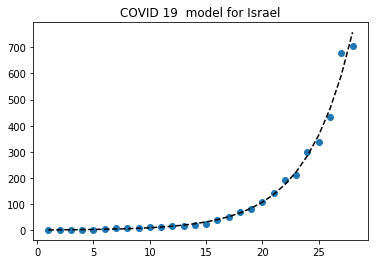

In [54]:
#loop 
from IPython.display import clear_output
%matplotlib inline
from time import sleep
for length in range (3,len(xs)):
    
    #print(length)
    #build  arrays
    xPartial=xs[:length]
    yPartial =ys[:length]
    yTransPartial= y_trans[:length]
    #fit model
    modelP = LinearRegression().fit(xPartial,yTransPartial)
    #get coeff
    #coefPartial = np.exp(modelP.coef)
    #get y_hat - partial
    y_fitPartial = modelP.predict(xPartial)
    
    plt.pause(0.7)
    clear_output()
    
    #graph
    plt.scatter(xPartial, yPartial)
    plt.plot(xPartial, np.exp(y_fitPartial), "k--" , label = "Fit partial" )
    plt.title("COVID 19  model for "+country)
    
    

    
    
    
    
    

Text(0.5, 1.0, 'COVID 19  model for Israel')

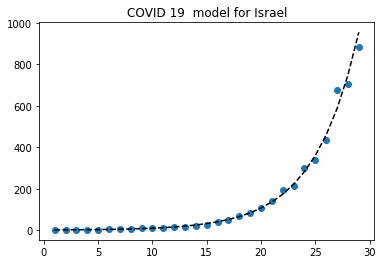

In [89]:
#graph
plt.scatter(xs, ys)
plt.plot(xs, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("COVID 19  model for "+country)

In [90]:
#show example of predicted value
np.exp(model.predict([[15]]))

array([[31.55803287]])

In [91]:
#predict function of easy prediction (dayNum)
def predict(day):
    return np.exp(model.predict(np.array([day]).reshape(-1,1)))[0][0]

In [92]:
for x in range(10,15):
    print("{:.0f} :  {:.1f}".format(x,predict(x) ) )

10 :  9.3
11 :  11.9
12 :  15.2
13 :  19.4
14 :  24.7


In [93]:
for i in range(0,12):
    print(str(i+1) + " " +str (ys[i][0]))

1 1
2 1
3 2
4 2
5 2
6 3
7 7
8 7
9 10
10 12
11 12
12 15


In [94]:
#compute average daily growth
def dailyGrowth (ys):   
    gs = []
    for i in range(1,len(ys)):
        g=  (ys[i]- ys[i-1])/ys[i-1]
        g = g[0]
        gs.append(g)
    return(gs)               
def avgDailyGrowth(ys):
    return np.mean(dailyGrowth(ys))

avgDailyGrowth(ys)


0.3018254296860727